**Loan Prediction Based on Customer Behavior**


In this dataset we have to predict whether the the customer should be given loan or not on basis of features given..

Target column is name as risk_flag and is in 0 and 1 values so this dataset is of Binary Classifaction 


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train=pd.read_csv("/content/Training_Data[1].csv")
test=pd.read_csv("/content/Test_Data[1].csv")
df=train.append(test)
df.drop(["Id","ID"],axis=1,inplace=True)
df.head()

<ipython-input-2-8b3c6c93a582>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=train.append(test)


,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0.0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0.0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0.0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1.0
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1.0


In [3]:
df["Risk_Flag"].value_counts()

0.0    221004
1.0     30996
Name: Risk_Flag, dtype: int64


1. Using value_count on target column we have found that this dataset is **Imbalanced dataset**
2. Target column also has NULL values so we have to drop the null values: We can drop NULL values beacause data set is very large so we can drop some null values



In [4]:
df["Risk_Flag"].isna().sum()
df["Risk_Flag"]=df["Risk_Flag"].dropna()

In [5]:
df.columns
cat_col=['Married/Single','House_Ownership','Profession','CITY',"STATE","Car_Ownership"]

**EDA**

1. We have check that how many unique values does Categorical column has: Max number of unique values CITY columns has 
2. Some of the values in city col had numbers in last so we have to clean the data before passing through model 
3. We have to convert Categorical columns into unique numbers through Labelencoder or Onehotencoder
4. Converting cols by LabelEncoder which cols have two or three categoricals in 
5. Two feature profession and state have more categoricals so we will use pd.get_dummies
6. Before doing pd.dummies we have found that by unique() that profession and state has repeated categoricals and some values are twice by _ differnces 

In [6]:
for i in cat_col:
 print("column name:",i,df[i].nunique())
 

column name: Married/Single 2
column name: House_Ownership 3
column name: Profession 74
column name: CITY 333
column name: STATE 37
column name: Car_Ownership 2


In [7]:
df[df["CITY"].str.islower()==True]
df["CITY"]=df["CITY"].str.replace(r'[\d\[\]]', '')

<ipython-input-7-295cc3cdc725>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["CITY"]=df["CITY"].str.replace(r'[\d\[\]]', '')


In [8]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0.0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0.0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0.0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1.0
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil_Nadu,3,14,1.0


In [9]:
df[["Age","Experience"]]

,Age,Experience
0,23,3
1,40,10
2,66,4
3,41,2
4,47,11
...,...,...
27995,57,13
27996,47,9
27997,24,5
27998,51,13


In [10]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

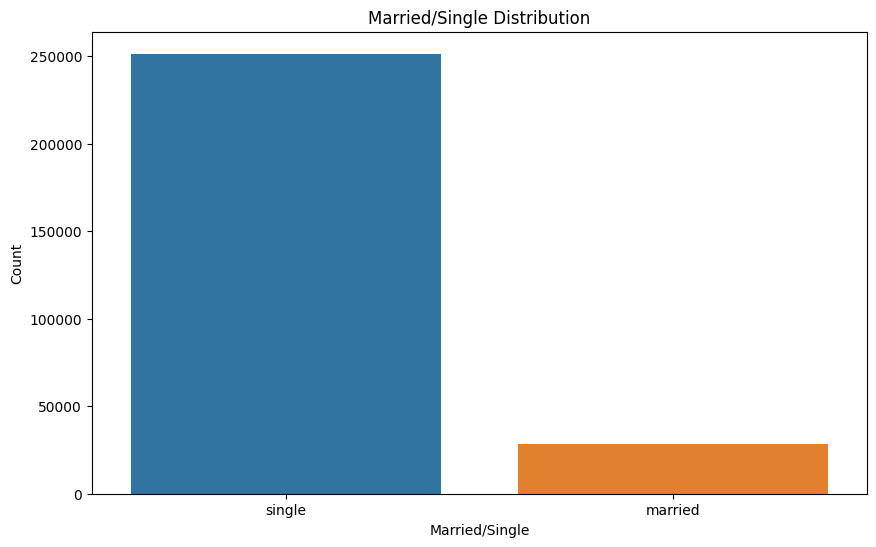

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Married/Single')
plt.title('Married/Single Distribution')
plt.xlabel('Married/Single')
plt.ylabel('Count')
plt.show()

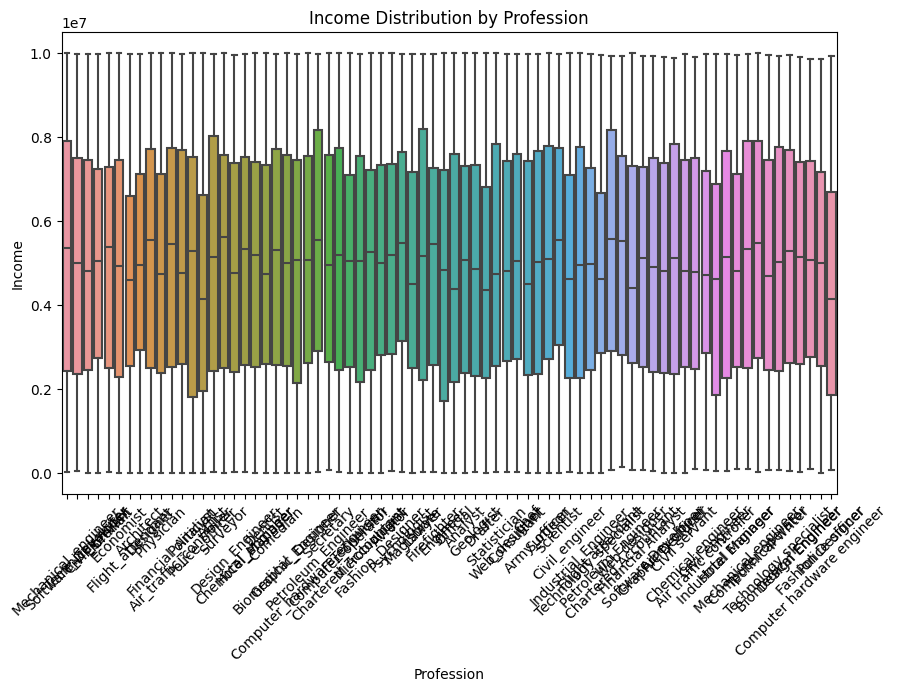

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Profession', y='Income')
plt.title('Income Distribution by Profession')
plt.xlabel('Profession')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

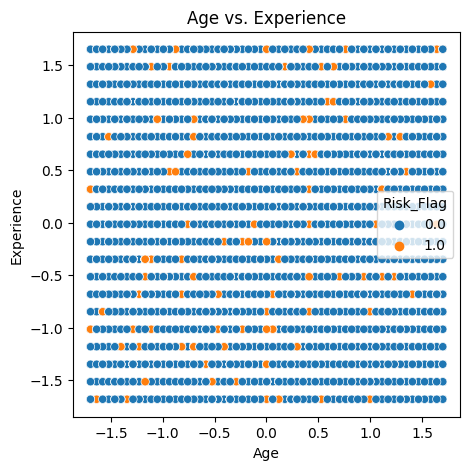

In [34]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Age', y='Experience', data=df, hue='Risk_Flag')
plt.xlabel('Age')
plt.ylabel('Experience')
plt.title('Age vs. Experience')
plt.show()

<ipython-input-31-fed76928edc8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


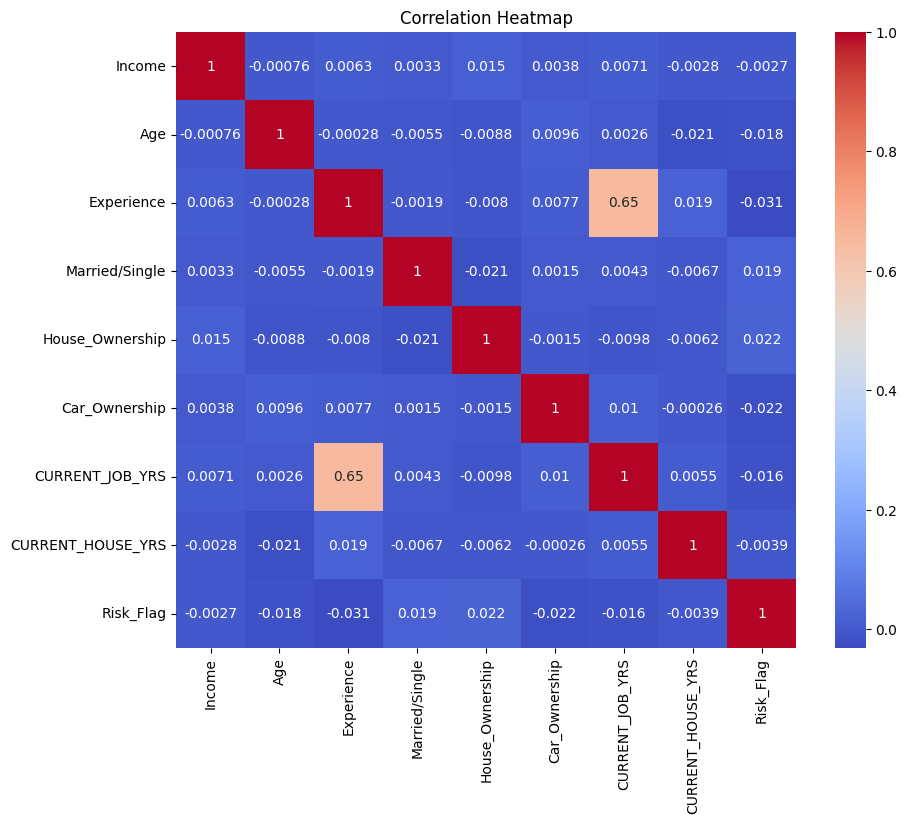

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

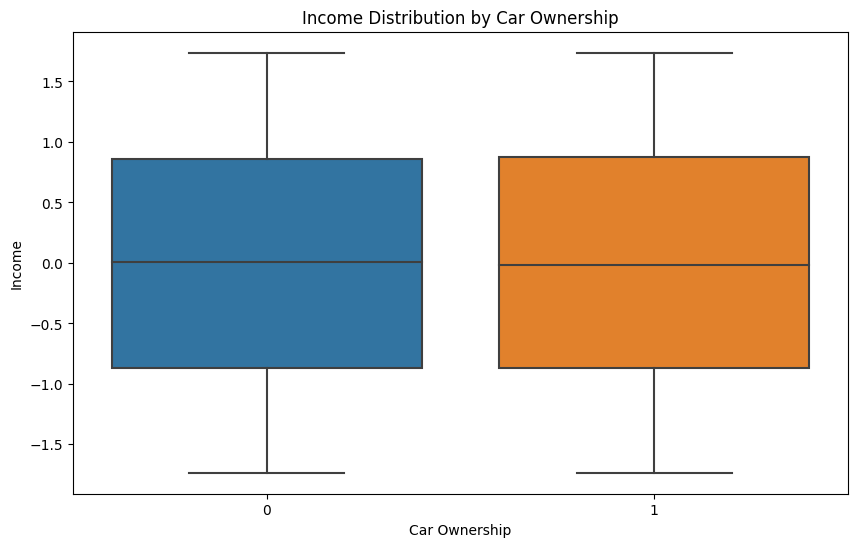

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Car_Ownership', y='Income', data=df)
plt.xlabel('Car Ownership')
plt.ylabel('Income')
plt.title('Income Distribution by Car Ownership')
plt.show()

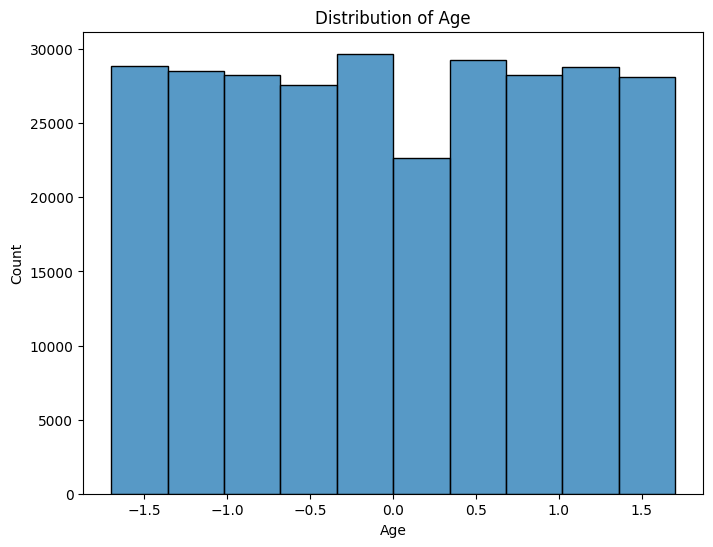

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

In [13]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0.0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0.0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0.0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1.0
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil_Nadu,3,14,1.0


In [14]:
df.drop("CITY",inplace=True,axis=1)
encoder_col=["Married/Single","House_Ownership","Car_Ownership"]


In [15]:
df["Profession"].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist',
       'Flight attendant', 'Petroleum Engineer', 'Chartered Accou

In [16]:
df["STATE"].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim', 'West Bengal',
       'Tamil Nadu', 'Andhra Pradesh', 'Madhya Pradesh', 'Uttar Pradesh',
       'Uttar Pradesh[5]', 'Jammu and Kashmir', 'Himachal Pradesh'],
      dtype=object)

In [17]:
df["STATE"]=df["STATE"].str.replace("_"," ")
df["Profession"]=df["Profession"].str.replace("_"," ")
df["STATE"]=df["STATE"].str.replace(r'[\d\[\]]',"")

<ipython-input-17-f743d727f46d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["STATE"]=df["STATE"].str.replace(r'[\d\[\]]',"")


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
label_cols=["Married/Single","House_Ownership","Car_Ownership"]
for i in label_cols:
  df[i]=encoder.fit_transform(df[i])

In [19]:
dummies_cols=["Profession","STATE"]
df_encoded=pd.get_dummies(df[dummies_cols])
df_encoded=df_encoded.astype("category")
df=pd.concat([df,df_encoded],axis=1)
df.drop(dummies_cols,inplace=True,axis=1)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Air traffic controller,...,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttarakhand,STATE_West Bengal
0,1303834,23,3,1,2,0,3,13,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,1,2,0,9,13,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3991815,66,4,0,2,0,4,10,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,6256451,41,2,1,2,1,2,12,1.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5768871,47,11,1,2,0,3,14,1.0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_cols=["Income","Age","CURRENT_HOUSE_YRS","CURRENT_JOB_YRS","Experience"]
for cols in scaler_cols:
  transformed_df=scaler.fit_transform(df.loc[:,[cols]])
  df.loc[:,[cols]]=transformed_df


In [21]:
from sklearn.model_selection import train_test_split
x=['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Profession_Air traffic controller', 'Profession_Analyst',
       'Profession_Architect', 'Profession_Army officer', 'Profession_Artist',
       'Profession_Aviator', 'Profession_Biomedical Engineer',
       'Profession_Chartered Accountant', 'Profession_Chef',
       'Profession_Chemical engineer', 'Profession_Civil engineer',
       'Profession_Civil servant', 'Profession_Comedian',
       'Profession_Computer hardware engineer', 'Profession_Computer operator',
       'Profession_Consultant', 'Profession_Dentist',
       'Profession_Design Engineer', 'Profession_Designer',
       'Profession_Drafter', 'Profession_Economist', 'Profession_Engineer',
       'Profession_Fashion Designer', 'Profession_Financial Analyst',
       'Profession_Firefighter', 'Profession_Flight attendant',
       'Profession_Geologist', 'Profession_Graphic Designer',
       'Profession_Hotel Manager', 'Profession_Industrial Engineer',
       'Profession_Lawyer', 'Profession_Librarian', 'Profession_Magistrate',
       'Profession_Mechanical engineer', 'Profession_Microbiologist',
       'Profession_Official', 'Profession_Petroleum Engineer',
       'Profession_Physician', 'Profession_Police officer',
       'Profession_Politician', 'Profession_Psychologist',
       'Profession_Scientist', 'Profession_Secretary',
       'Profession_Software Developer', 'Profession_Statistician',
       'Profession_Surgeon', 'Profession_Surveyor',
       'Profession_Technical writer', 'Profession_Technician',
       'Profession_Technology specialist', 'Profession_Web designer',
       'STATE_Andhra Pradesh', 'STATE_Assam', 'STATE_Bihar',
       'STATE_Chandigarh', 'STATE_Chhattisgarh', 'STATE_Delhi',
       'STATE_Gujarat', 'STATE_Haryana', 'STATE_Himachal Pradesh',
       'STATE_Jammu and Kashmir', 'STATE_Jharkhand', 'STATE_Karnataka',
       'STATE_Kerala', 'STATE_Madhya Pradesh', 'STATE_Maharashtra',
       'STATE_Manipur', 'STATE_Mizoram', 'STATE_Odisha', 'STATE_Puducherry',
       'STATE_Punjab', 'STATE_Rajasthan', 'STATE_Sikkim', 'STATE_Tamil Nadu',
       'STATE_Telangana', 'STATE_Tripura', 'STATE_Uttar Pradesh',
       'STATE_Uttarakhand', 'STATE_West Bengal']
y=["Risk_Flag"]

xtrain,xtest,ytrain,ytest=train_test_split(df[x],df[y],test_size=0.3,random_state=16)

Feature Selection :

1. First we have used VarianceThreshold and put the limit 5% , Variance means spread of data .. but after using i have found that only 15 feature are under threshold so we have used different feature selection method 
2. Second method is ANOVO method 

In [22]:
from sklearn.feature_selection import VarianceThreshold
sel=VarianceThreshold(threshold=0.05)
sel.fit(xtrain)

VarianceThreshold(threshold=0.05)

In [23]:
sum(sel.get_support())

15

In [24]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


sel=SelectKBest(f_classif,k=50).fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
xtrain.columns[sel.get_support()]

Index(['Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Profession_Air traffic controller', 'Profession_Army officer',
       'Profession_Chartered Accountant', 'Profession_Civil servant',
       'Profession_Dentist', 'Profession_Design Engineer',
       'Profession_Designer', 'Profession_Drafter', 'Profession_Economist',
       'Profession_Financial Analyst', 'Profession_Geologist',
       'Profession_Hotel Manager', 'Profession_Industrial Engineer',
       'Profession_Lawyer', 'Profession_Petroleum Engineer',
       'Profession_Police officer', 'Profession_Scientist',
       'Profession_Software Developer', 'Profession_Surveyor',
       'Profession_Technical writer', 'Profession_Technology specialist',
       'Profession_Web designer', 'STATE_Andhra Pradesh', 'STATE_Bihar',
       'STATE_Chandigarh', 'STATE_Chhattisgarh', 'STATE_Delhi',
       'STATE_Gujarat', 'STATE_Jammu and Kashmir', 'STATE_Jharkhand'

In [26]:
columns = xtrain.columns[sel.get_support()]
xtrain = sel.transform(xtrain)
xtest = sel.transform(xtest)


# After transforming the data its converted to NUMPY ARRAY so we have to convert it back to DATAFRAME
xtrain = pd.DataFrame(xtrain, columns=columns)
xtest = pd.DataFrame(xtest, columns=columns)

ML Model 

1. We can't use RandomForestClassifier beacause RFC doesn't work good with Imbalanced data 
2. So thatwhy i have used XGBoost for this dataset..  XGBoost's ability to handle imbalanced data and its high prediction performance made it an ideal choice for this project. 
3. And beacause of Imbalanced dataset we can use ACCURACY as a Performance metrics 
4. According to this dataset i have used RECALL as Performance Metrics 

In [28]:
import xgboost as xgb
from sklearn.metrics import recall_score
xg=xgb.XGBClassifier()
xg.fit(xtrain,ytrain)
xg_pre=xg.predict(xtest)
print("Recall Score:",recall_score(ytest,xg_pre))

Recall Score: 0.08901569186875892


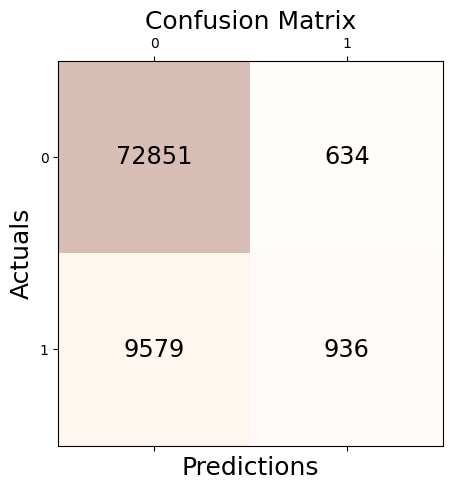

In [29]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=ytest, y_pred=xg_pre)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()